In [53]:
#

import xbbg
import scipy
from scipy.interpolate import CubicSpline
from xbbg import blp
import numpy as np
import pandas as pd
from pandas.tseries.holiday import USFederalHolidayCalendar
from pandas.tseries.offsets import CustomBusinessDay
from datetime import datetime
from dateutil.relativedelta import relativedelta
from matplotlib.pyplot import plot
from matplotlib import pyplot as plt
import os
import matplotlib.ticker as plticker
import pandas_datareader as pdr
import matplotlib.ticker as mticker
#data
#load portfolio tickers
port_df = pd.read_csv('test_trades.csv', index_col = None)
port_df['bbg_ticker']= port_df.apply(lambda x: str(x['name'])+' US Equity', axis = 1)

port_df['Date']= pd.to_datetime(port_df['Date'])
port_df.set_index('Date', inplace = True)

In [5]:

port_df#['Date']= pd.to_datetime(port_df['Date'])

,name,ticker,Shs,bbg_ticker
Date,,,,
2024-01-10,XBI,XBI US Equity,-11200,XBI US Equity
2024-01-10,SPY,SPY US Equity,2103,SPY US Equity
2024-01-16,CELH,CELH US Equity,-18342,CELH US Equity
2024-01-16,XLP,XLP US Equity,13883,XLP US Equity
2024-01-17,XBI,XBI US Equity,11320,XBI US Equity
2024-01-17,SPY,SPY US Equity,-2117,SPY US Equity
2024-01-17,SOFI,SOFI US Equity,132800,SOFI US Equity
2024-01-17,XLF,XLF US Equity,-26831,XLF US Equity
2024-01-22,SUN,SUN US Equity,18000,SUN US Equity


In [54]:
#grab ticker data and 
tickers = port_df['bbg_ticker'].unique()

start_date = datetime.today()- \
                        relativedelta(days = 60) #datetime.strptime(df.index[-10],'%d/%m/%Y')
#set end date (t)
end_date = datetime.today()#.strftime('%d/%m/%Y')
#ticker = str('TYA Comdty')
#lets do outright futures, swap spreads and future spreads
fut = blp.bdh(tickers=tickers
             , flds=['Px_last'],
             start_date= start_date, end_date=end_date,Per='D')
fut.index.names = ['date']
fut.index = fut.index#.strftime('%d/%m/%Y')
fut.columns = fut.columns.droplevel(1)
fut.index= pd.to_datetime(fut.index)
df = fut.copy()
df_ret = 1-df.diff()/df.shift(1)
df_std = df_ret.ewm(com = 60).std()



,ARM US Equity,name,ticker,Shs,bbg_ticker
date,,,,,
2023-12-28,77.470,NaN,NaN,NaN,NaN
2023-12-29,75.145,NaN,NaN,NaN,NaN
2024-01-02,68.920,NaN,NaN,NaN,NaN
2024-01-03,67.910,NaN,NaN,NaN,NaN
2024-01-04,68.390,NaN,NaN,NaN,NaN
2024-01-05,67.050,NaN,NaN,NaN,NaN
2024-01-08,72.840,NaN,NaN,NaN,NaN
2024-01-09,71.880,NaN,NaN,NaN,NaN
2024-01-10,70.770,NaN,NaN,NaN,NaN


In [55]:
df_returns = pd.DataFrame()
df_exposure = pd.DataFrame()

for ti in port_df['bbg_ticker'].unique():
    df2 = pd.merge(df[ti],port_df[port_df['bbg_ticker']==ti],how = 'left', left_index=True, right_index=True )
    df2['Shs'] = df2['Shs'].fillna(0)
    df2['Shs'] = df2['Shs'].cumsum()
    df2['px_change'] = df2[[ti]].diff()
    df2[str(ti)+'pnl']=df2['px_change']*df2['Shs']
    df_returns[str(ti)+'pnl'] = df2[str(ti)+'pnl']
    df_exposure[ti]= df2['Shs']*df2[ti]

    
df_returns['aggregate'] = df_returns[list(df_returns.columns)].sum(axis=1)


In [57]:
df2[str(ti)+'pnl']=df2['px_change']*df2['Shs']

In [56]:
df2

,ARM US Equity,name,ticker,Shs,bbg_ticker,px_change,ARM US Equitypnl
date,,,,,,,
2024-01-02,68.920,NaN,NaN,0.0,NaN,NaN,NaN
2024-01-03,67.910,NaN,NaN,0.0,NaN,-1.010,-0.0
2024-01-04,68.390,NaN,NaN,0.0,NaN,0.480,0.0
2024-01-05,67.050,NaN,NaN,0.0,NaN,-1.340,-0.0
2024-01-08,72.840,NaN,NaN,0.0,NaN,5.790,0.0
2024-01-09,71.880,NaN,NaN,0.0,NaN,-0.960,-0.0
2024-01-10,70.770,NaN,NaN,0.0,NaN,-1.110,-0.0
2024-01-11,69.770,NaN,NaN,0.0,NaN,-1.000,-0.0
2024-01-12,70.000,NaN,NaN,0.0,NaN,0.230,0.0


In [70]:
df_returns.to_csv('model_portfolio_equities.csv')#['aggregate'].plot()

Text(0, 0.5, 'usd')

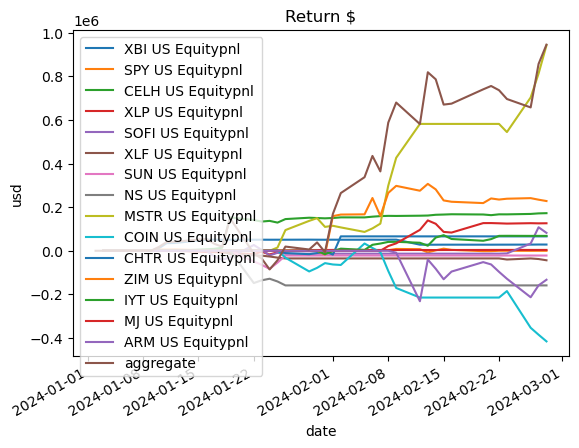

In [57]:
df_returns.cumsum().plot()
plt.title('Return $')
plt.xlabel('date')
plt.ylabel('usd')

Text(0, 0.5, 'usd')

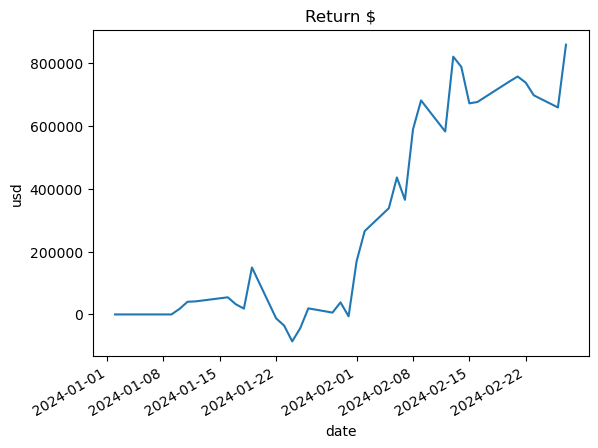

In [12]:
df_returns['aggregate'].cumsum().plot()
plt.title('Return $')
plt.xlabel('date')
plt.ylabel('usd')

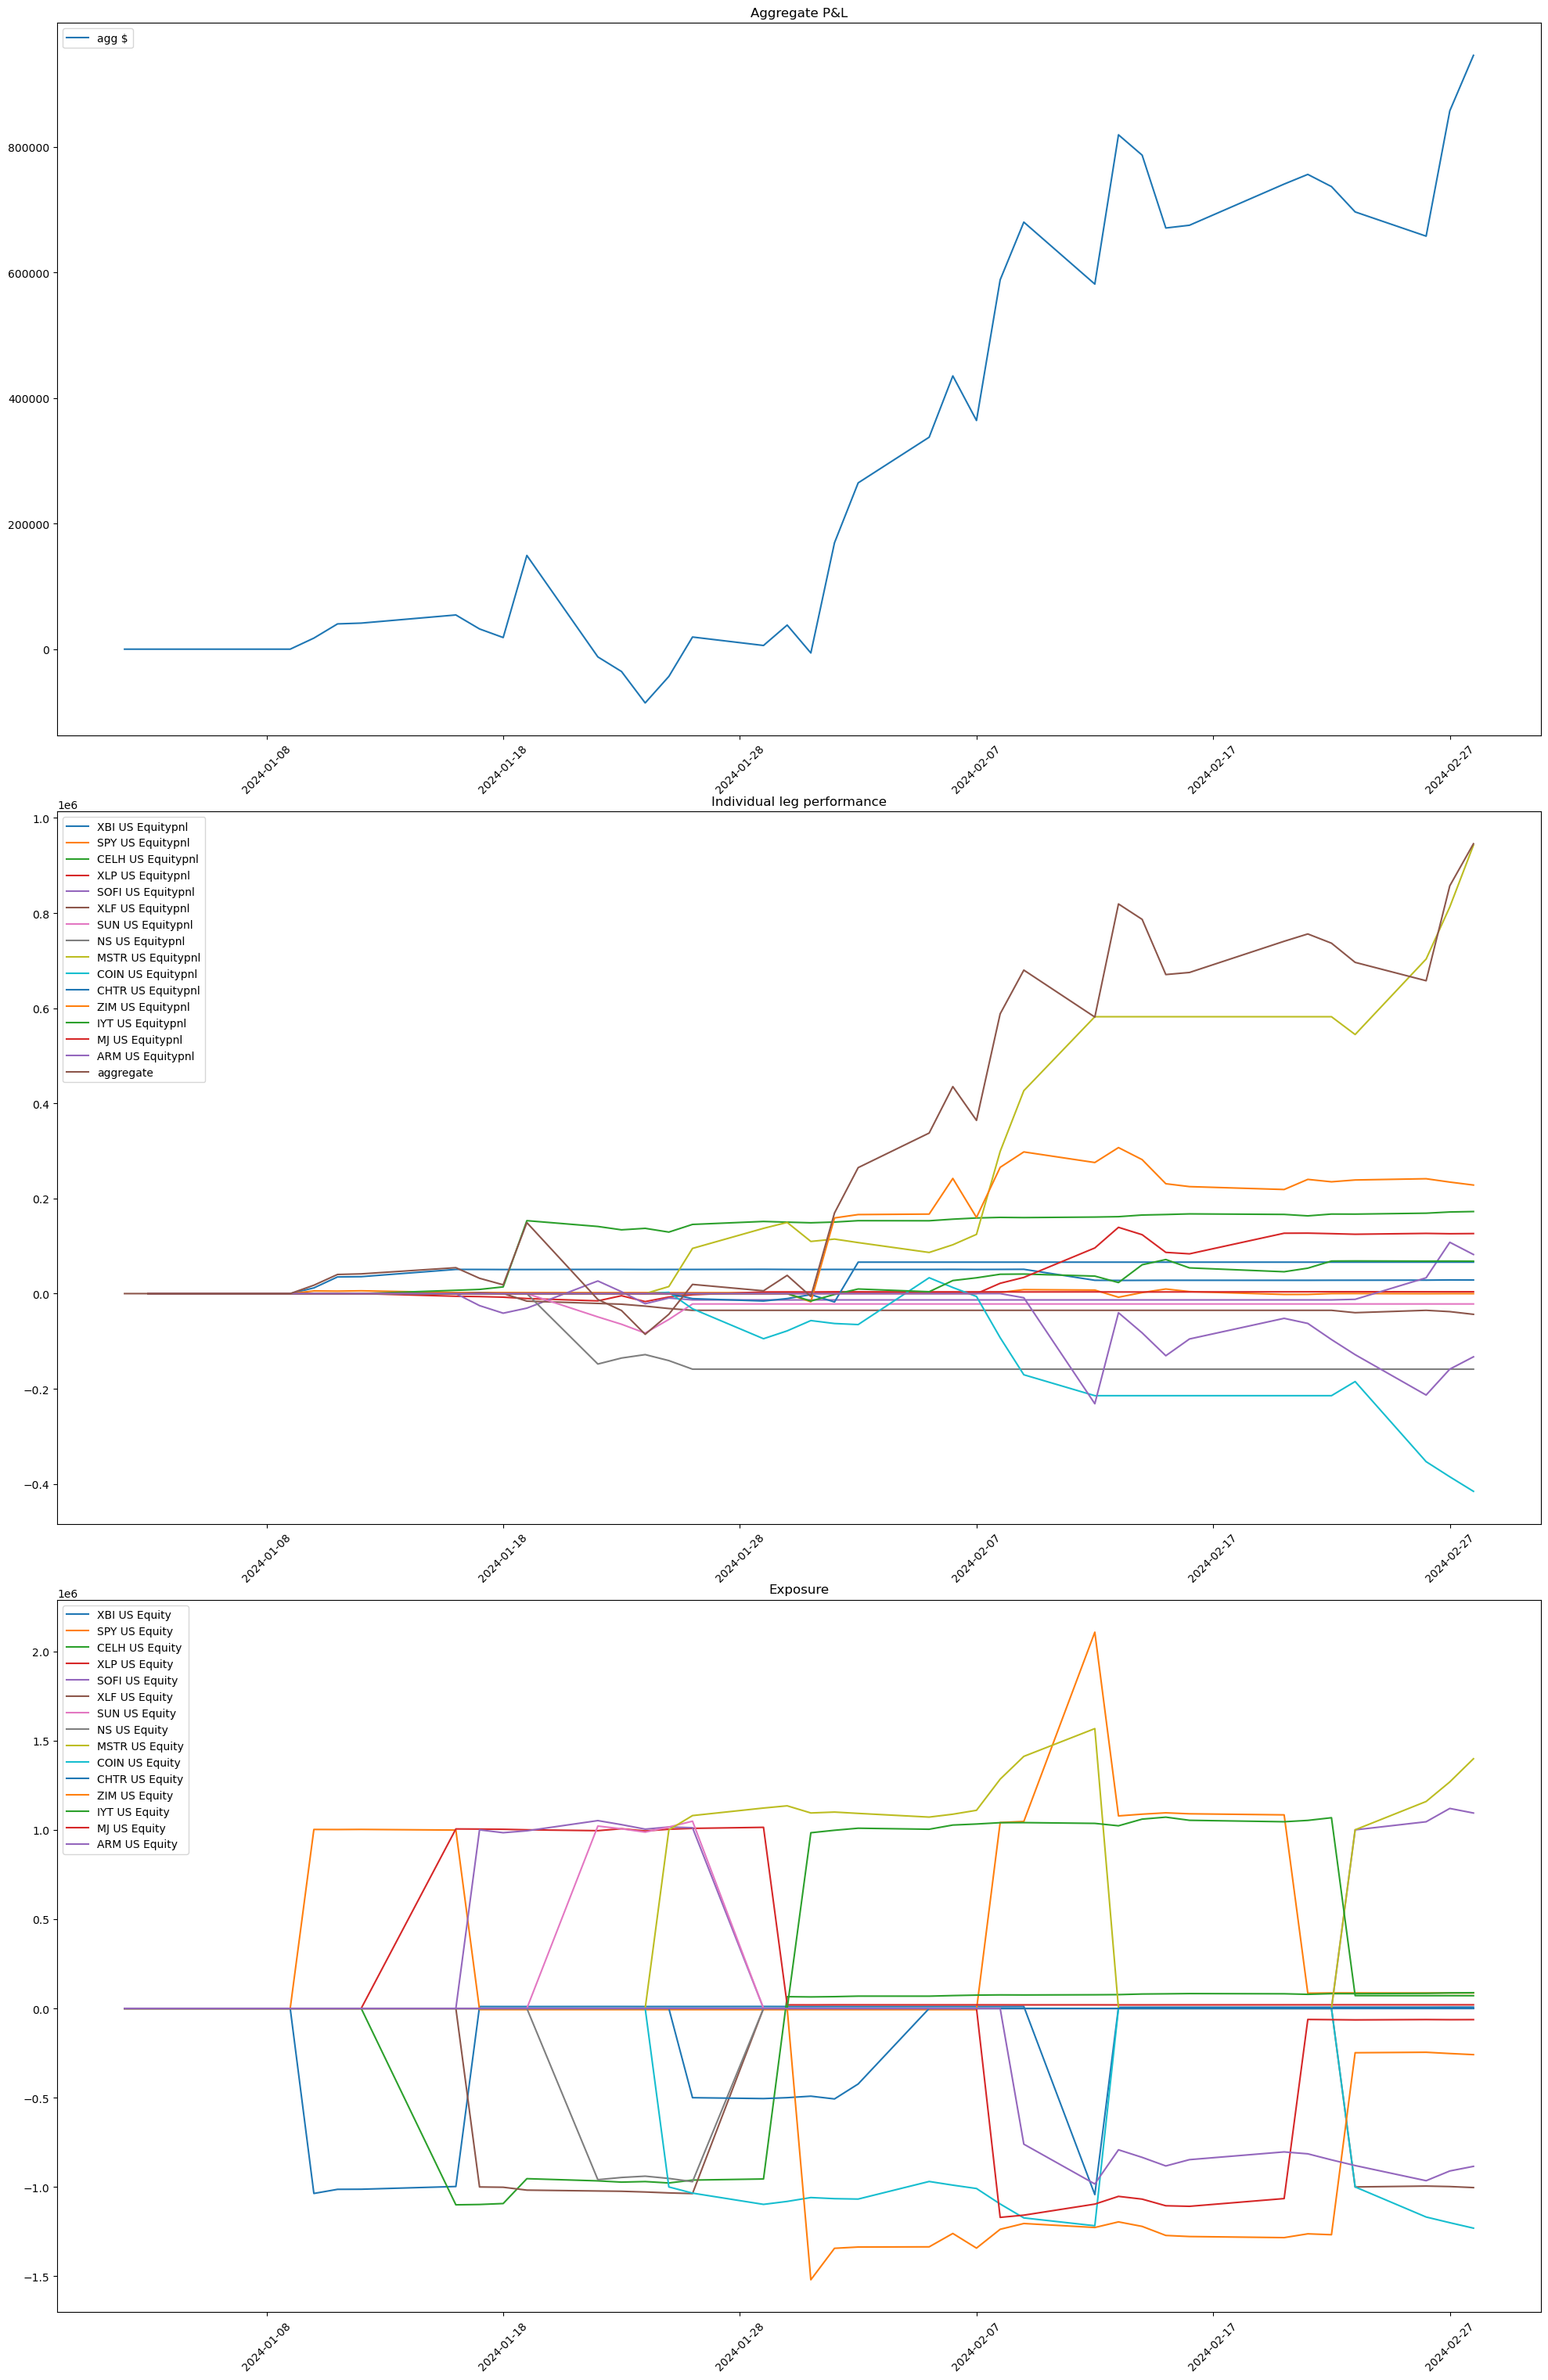

In [58]:
fig, ax = plt.subplots(nrows=3, ncols=1,figsize=(20, 30))
ax[0].set_title("Aggregate P&L")
ax[0].plot(df_returns['aggregate'].cumsum() ,label ='agg $');
loc = plticker.MultipleLocator(base=10)
ax[0].legend(loc="upper left",prop={'size': 10})
ax[0].xaxis.set_major_locator(loc)
ax[0].tick_params(axis='x', rotation=45)
plt.tight_layout()

ax[1].set_title("Individual leg performance")
ax[1].plot(df_returns.cumsum(), label =df_returns.columns );

#ax.axhline(y=round(PC3param.gamma,2), color='r', linestyle = '--');
#ax.plot(df['principal component 3'], 'b', label ='PC3(curve)');
loc = plticker.MultipleLocator(base=10)
ax[1].legend(loc="upper left",prop={'size': 10})
ax[1].xaxis.set_major_locator(loc)
ax[1].tick_params(axis='x', rotation=45)

ax[2].set_title("Exposure")
ax[2].plot(df_exposure, label =df_positions.columns );
ax[2].legend(loc="upper left",prop={'size': 10})
ax[2].xaxis.set_major_locator(loc)
ax[2].tick_params(axis='x', rotation=45)

In [59]:
df_returns['NAV']=(df_returns['aggregate'].cumsum()+10000000)

df_returns['%return']= (df_returns['NAV'].diff()/df_returns['NAV'])


<AxesSubplot:xlabel='date'>

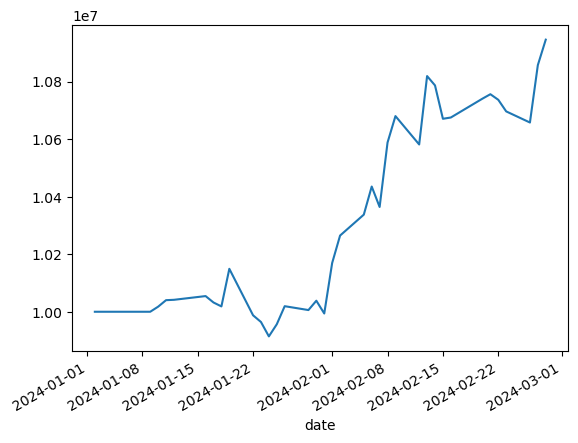

In [60]:
df_returns['NAV'].plot()

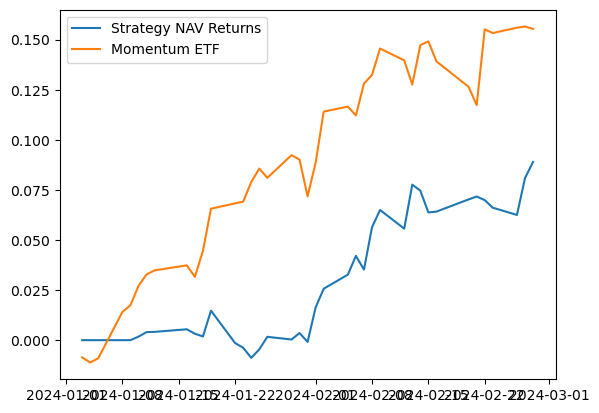

In [61]:
#momentum etf vs returns of strategy

plt.plot(df_returns['%return'].cumsum(), label = 'Strategy NAV Returns')
momo_df = blp.bdh(tickers=['MTUM US Equity']
             , flds=['Px_last'],
             start_date= start_date, end_date=end_date,Per='D')

momo_df['momo_etf_return'] = momo_df['MTUM US Equity'].diff()/ momo_df['MTUM US Equity']
plt.plot(momo_df['momo_etf_return'].cumsum(), label = 'Momentum ETF')

#plot.legend(loc='best')
plt.legend(loc='best')
plt.show()


In [63]:
# calculate the Pearson's correlation between momo and strategy returns
from numpy.random import randn
from numpy.random import seed
from scipy.stats import pearsonr

# calculate Pearson's correlation
corr, _ = pearsonr(df_returns['%return'].fillna(0), momo_df['momo_etf_return'].fillna(0) )
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.017


In [52]:
df_returns['%return']

date
2024-01-02         NaN
2024-01-03    0.000000
2024-01-04    0.000000
2024-01-05    0.000000
2024-01-08    0.000000
2024-01-09    0.000000
2024-01-10    0.001759
2024-01-11    0.002254
2024-01-12    0.000125
2024-01-16    0.001290
2024-01-17   -0.002219
2024-01-18   -0.001366
2024-01-19    0.012882
2024-01-22   -0.016177
2024-01-23   -0.002338
2024-01-24   -0.005046
2024-01-25    0.004236
2024-01-26    0.006266
2024-01-29   -0.001345
2024-01-30    0.003236
2024-01-31   -0.004445
2024-02-01    0.017262
2024-02-02    0.009288
2024-02-05    0.007037
2024-02-06    0.009356
2024-02-07   -0.006854
2024-02-08    0.021156
2024-02-09    0.008608
2024-02-12   -0.009327
2024-02-13    0.021975
2024-02-14   -0.003006
2024-02-15   -0.010870
2024-02-16    0.000411
2024-02-20    0.006105
2024-02-21    0.001433
2024-02-22   -0.001808
2024-02-23   -0.003771
2024-02-26   -0.003624
2024-02-27    0.018381
Name: %return, dtype: float64

In [51]:
 momo_df['momo_etf_return']

2024-01-02         NaN
2024-01-03   -0.008578
2024-01-04   -0.002560
2024-01-05    0.002096
2024-01-08    0.023104
2024-01-09    0.003381
2024-01-10    0.009665
2024-01-11    0.005715
2024-01-12    0.002006
2024-01-16    0.002501
2024-01-17   -0.005722
2024-01-18    0.012910
2024-01-19    0.021084
2024-01-22    0.002666
2024-01-23    0.000848
2024-01-24    0.009773
2024-01-25    0.006729
2024-01-26   -0.004607
2024-01-29    0.011298
2024-01-30   -0.002193
2024-01-31   -0.018352
2024-02-01    0.016797
2024-02-02    0.025508
2024-02-05    0.002481
2024-02-06   -0.004404
2024-02-07    0.015911
2024-02-08    0.004315
2024-02-09    0.013168
2024-02-12   -0.005918
2024-02-13   -0.012037
2024-02-14    0.019630
2024-02-15    0.001898
2024-02-16   -0.009979
2024-02-20   -0.012732
2024-02-21   -0.009103
2024-02-22    0.037807
2024-02-23   -0.001833
2024-02-26    0.002659
2024-02-27    0.000609
2024-02-28   -0.001775
Name: momo_etf_return, dtype: float64

In [35]:
momo_df['momo_etf_return'] = momo_df['momo_etf_return'].diff()/ momo_df['momo_etf_return']

,MTUM US Equity
,Px_last
2024-01-02,154.02
2024-01-03,152.71
2024-01-04,152.32
2024-01-05,152.64
2024-01-08,156.25
2024-01-09,156.78
2024-01-10,158.31
2024-01-11,159.22
2024-01-12,159.54


In [88]:
sharpe = np.sqrt(252)*np.mean(df_returns['aggregate'])/np.std(df_returns['aggregate'])
sharpe

3.3461591507687047

In [88]:
#assume the inception date is from Jan1 2024
df_ret_ytd = fut.copy()
df_ret_ytd.index= pd.to_datetime(df_ret.index)
df_ret_ytd =df_ret_ytd[df_ret_ytd.index >= '2024-01-01']
df_ret_ytd = 1-df.diff()/df.shift(1)
#create agg positions
agg_positions = port_df[['bbg_ticker','QTY']].groupby('bbg_ticker').sum()
agg_port_exposure = fut.apply(lambda x: x*agg_positions['QTY'][x.name], axis = 0 )
agg_port_exposure.index= pd.to_datetime(agg_port_exposure.index)
agg_port_exposure =agg_port_exposure[agg_port_exposure.index >= '2024-01-01']
#returns
agg_port_returns = agg_port_exposure.diff().cumsum()#.plot()



In [103]:
agg_port_returns

,MJ US Equity,SPY US Equity,ZIM US Equity,IYT US Equity,SUN US Equity,NS US Equity,SIRI US Equity,SOFI US Equity,XLF US Equity,MSTR US Equity,COIN US Equity,CELH US Equity,XLP US Equity,XBI US Equity
date,,,,,,,,,,,,,,
2024-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-01-03,28985.5000,7743.16,88797.16,13693.14,23400.0,1350.0,-10395.0,-159145.1000,8184.00,-70262.91,28930.40,-58664.950,7840.35,-221416.16
2024-01-04,46376.8000,10772.22,200830.96,13585.32,11880.0,10350.0,-12474.0,-146080.9500,4347.75,-38112.66,7980.80,-39642.800,9215.85,-85076.16
2024-01-05,78260.8500,9488.38,282159.20,9595.98,31320.0,6300.0,-6237.0,-169833.9500,255.75,-70236.93,18081.50,-27973.750,11416.65,-101436.96
2024-01-08,78260.8500,-3911.70,205810.24,-1114.14,13680.0,7650.0,-2079.0,-133016.8000,-5882.25,-113194.86,-15836.90,-14066.800,4126.50,347939.68
2024-01-09,40579.7000,-2467.38,138589.96,1114.14,28800.0,12600.0,-18711.0,-157957.4500,255.75,-140110.14,30489.15,-15185.750,1513.05,367572.64
2024-01-10,0.0000,-7843.46,141079.60,-8338.08,19980.0,13050.0,-24948.0,-138955.0500,-1278.75,-155204.52,34853.65,12148.600,3576.30,250865.60
2024-01-11,26086.9500,-7422.20,209959.64,-6469.20,45540.0,5850.0,-51975.0,-175772.2000,2301.75,-193512.03,98014.20,479.550,3713.85,26177.28
2024-01-12,69565.2000,-8084.18,188382.76,3342.42,71640.0,450.0,-58212.0,-209026.4000,4092.00,-259306.38,162733.50,21100.200,550.20,20723.68


<AxesSubplot:xlabel='date'>

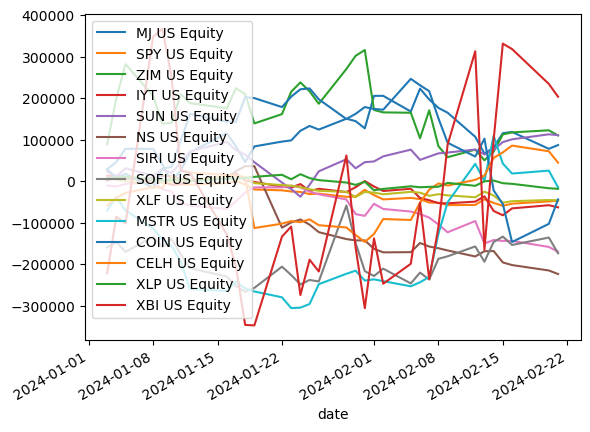

In [104]:
agg_port_returns.plot()

In [106]:
agg_port_returns.sum(axis = 1)#.plot()

date
2024-01-02         0.000
2024-01-03   -310960.410
2024-01-04     -6046.870
2024-01-05     71159.720
2024-01-08    368364.820
2024-01-09    287082.670
2024-01-10    138985.890
2024-01-11    -17027.410
2024-01-12      7951.000
2024-01-16   -110367.620
2024-01-17   -143386.160
2024-01-18   -315228.310
2024-01-19   -504146.670
2024-01-22   -440483.315
2024-01-23   -390568.110
2024-01-24   -515819.160
2024-01-25   -443234.300
2024-01-26   -499492.740
2024-01-29     20544.040
2024-01-30   -329709.360
2024-01-31   -509760.530
2024-02-01   -439483.470
2024-02-02   -537417.280
2024-02-05   -472127.100
2024-02-06   -307912.520
2024-02-07   -466551.890
2024-02-08   -360808.070
2024-02-09   -204241.720
2024-02-12     90125.100
2024-02-13   -480531.900
2024-02-14   -138210.750
2024-02-15     44109.240
2024-02-16    -56210.090
2024-02-20   -130969.900
2024-02-21   -239427.791
dtype: float64

In [82]:
#df_ret_ytd =df_ret_ytd[df_ret_ytd.index >= '2024-01-01']
df_ret_ytd

,MJ US Equity,SPY US Equity,ZIM US Equity,IYT US Equity,SUN US Equity,NS US Equity,SIRI US Equity,SOFI US Equity,XLF US Equity,MSTR US Equity,COIN US Equity,CELH US Equity,XLP US Equity,XBI US Equity
date,,,,,,,,,,,,,,
2022-10-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-10-06,0.804527,1.010316,1.010770,1.006318,1.028515,1.013058,1.006700,0.998106,1.014023,1.002147,0.987118,0.993716,1.014596,1.000000
2022-10-07,1.120482,1.027894,1.032258,1.029218,1.000766,1.003482,1.010118,1.052930,1.023704,1.088426,1.093492,1.045510,1.014961,1.043184
2022-10-10,1.054795,1.007635,0.984583,1.001050,1.004598,1.026555,0.989779,1.007984,1.004532,0.998411,0.999403,0.957109,0.996391,1.018331
2022-10-11,1.041408,1.006333,1.016824,1.009909,0.997947,0.981335,0.993255,0.993964,1.012683,1.019397,0.953461,1.032834,0.991759,0.992015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-02-14,0.985294,0.990912,0.978814,0.963454,0.989423,1.000443,0.991614,0.950125,0.990447,0.877759,0.857611,0.955244,1.001922,0.972723
2024-02-15,0.965217,0.993100,0.958506,0.989613,0.983483,0.972973,1.002079,0.986936,0.982864,1.067387,0.967016,0.986733,0.993535,0.976629
2024-02-16,0.997199,1.004980,0.995219,1.016398,0.994048,0.993960,1.000000,1.019930,1.003520,1.025682,0.911632,0.983909,0.998497,1.001287


In [85]:
fut.apply(lambda x: x*agg_positions['QTY'][x.name], axis = 0 )

,MJ US Equity,SPY US Equity,ZIM US Equity,IYT US Equity,SUN US Equity,NS US Equity,SIRI US Equity,SOFI US Equity,XLF US Equity,MSTR US Equity,COIN US Equity,CELH US Equity,XLP US Equity,XBI US Equity
date,,,,,,,,,,,,,,
2022-10-05,1.408695e+06,-756442.54,2080509.16,-745215.90,725940.0,-654750.0,1241163.0,6.270792e+05,-820701.75,314604.81,-454967.95,4.747017e+05,-942355.05,9016982.24
2022-10-06,1.684058e+06,-748639.20,2058102.40,-740507.76,705240.0,-646200.0,1232847.0,6.282668e+05,-809193.00,313929.33,-460828.85,4.776846e+05,-928600.05,9016982.24
2022-10-07,1.481159e+06,-727756.74,1991712.00,-718871.88,704700.0,-643950.0,1220373.0,5.950127e+05,-790011.75,286169.70,-417745.00,4.559450e+05,-914707.50,8627595.20
2022-10-10,1.400000e+06,-722200.12,2022417.56,-718117.14,701460.0,-626850.0,1232847.0,5.902620e+05,-786431.25,286624.35,-417994.40,4.755010e+05,-918008.70,8469440.80
2022-10-11,1.342029e+06,-717626.44,1988392.48,-711001.02,702900.0,-638550.0,1241163.0,5.938250e+05,-776457.00,281064.63,-437447.60,4.598885e+05,-925573.95,8537065.44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-02-14,9.999998e+05,-1000131.42,1000005.40,-999994.56,1100700.0,-1015650.0,999999.0,1.000001e+06,-999982.50,1000074.12,-999969.30,1.000022e+06,-999988.50,9940822.08
2024-02-15,1.034782e+06,-1007032.06,1041499.40,-1010381.22,1118880.0,-1043100.0,997920.0,1.013065e+06,-1017117.75,932682.00,-1032952.45,1.013289e+06,-1006453.35,10173145.44
2024-02-16,1.037681e+06,-1002017.06,1046478.68,-993812.88,1125540.0,-1049400.0,997920.0,9.928754e+05,-1013537.25,908728.44,-1124232.85,1.029594e+06,-1007966.40,10160056.80


In [54]:
agg_positions['QTY']

bbg_ticker
CELH US Equity     15985
COIN US Equity     -6235
IYT US Equity      -3594
MJ US Equity      289855
MSTR US Equity      1299
NS US Equity      -45000
SIRI US Equity    207900
SOFI US Equity    118765
SPY US Equity      -2006
SUN US Equity      18000
XBI US Equity     109072
XLF US Equity     -25575
XLP US Equity     -13755
ZIM US Equity      82988
Name: QTY, dtype: int64

In [48]:
df_ret.index

DatetimeIndex(['2022-10-05', '2022-10-06', '2022-10-07', '2022-10-10',
               '2022-10-11', '2022-10-12', '2022-10-13', '2022-10-14',
               '2022-10-17', '2022-10-18',
               ...
               '2024-02-07', '2024-02-08', '2024-02-09', '2024-02-12',
               '2024-02-13', '2024-02-14', '2024-02-15', '2024-02-16',
               '2024-02-20', '2024-02-21'],
              dtype='datetime64[ns]', name='date', length=346, freq=None)

<AxesSubplot:xlabel='date'>

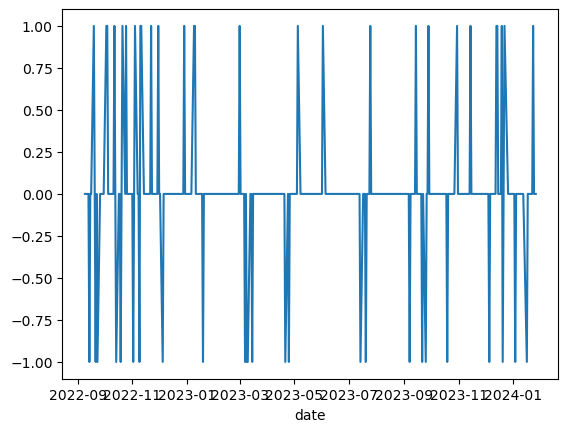

In [80]:
df['signal'].plot()

In [81]:

#volatility target the positions.
#calculate the rolling 20 day std
df['rolling_std']= df['pct_ret'].ewm(com = 20).std()

#set a target volatility... here we set the average
target_vol = df['rolling_std'].mean()

#set the leverage /position sizing to scale up or down to target vol
df['leverage_factor'] = target_vol/df['rolling_std']
#scale the entry positions by the leverage factor
df['scaled_signal']= df['signal']*df['leverage_factor']

<AxesSubplot:xlabel='date'>

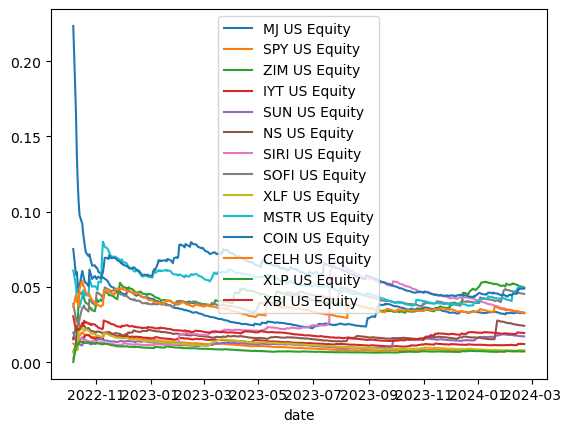

In [18]:
df_std.plot()

<AxesSubplot:xlabel='date'>

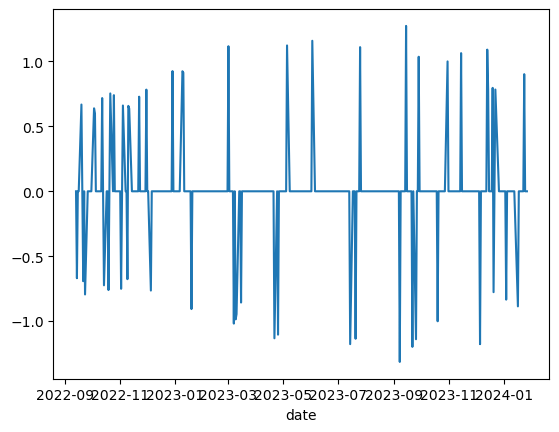

In [83]:
df['scaled_signal'].plot()

In [84]:
#set a holding_period, then we shift signals over that horizon and add to get overall active positioning
holding_period = 5

df_pos = df[['scaled_signal']].copy()
for i in range(1, holding_period):
    df_pos['scaled_signal_'+str(i)] = df_pos['scaled_signal'].shift(i)
df_pos.fillna(0,inplace = True)
df_pos['pos'] = df_pos.sum(axis=1)
df= pd.merge(df,df_pos[['pos']], how = 'left', left_index = True, right_index = True)

<AxesSubplot:xlabel='date'>

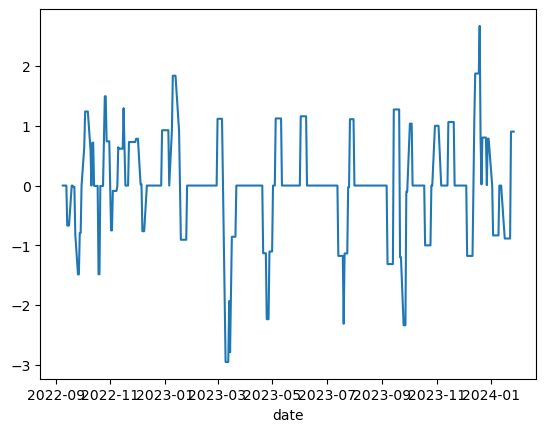

In [85]:
df_pos['pos'].plot()

<AxesSubplot:xlabel='date'>

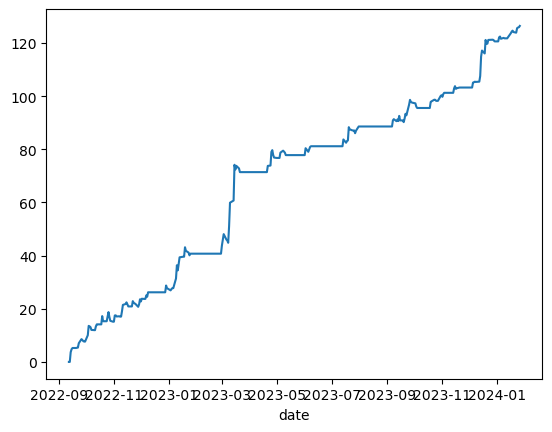

In [86]:
df['strategy_returns']= df['daily_ret']*df['pos']
df['strategy_returns'].cumsum().plot()

In [12]:
import numpy as np
import pandas as pd
#import matplotlib.pyplot as plt
#import statsmodels.formula.api as sm
#import statsmodels.tsa.stattools as ts
#import statsmodels.tsa.vector_ar.vecm as vm
from scipy.stats.stats import pearsonr
for lookback in [1, 5, 10, 25, 60]:
    for holddays in [1, 5, 10, 25, 60]:
        ret_lag=df.pct_change(periods=lookback)
        ret_fut=df.shift(-holddays).pct_change(periods=holddays)
            if (lookback >= holddays):
            indepSet=range(0, ret_lag.shape[0], holddays)
        else:
            indepSet=range(0, ret_lag.shape[0], lookback)
            
        ret_lag=ret_lag.iloc[indepSet]
        ret_fut=ret_fut.iloc[indepSet]
        goodDates=(ret_lag.notna() & ret_fut.notna()).values
        (cc, pval)=pearsonr(np.squeeze(np.asarray(ret_lag[goodDates])), np.squeeze(np.asarray(ret_fut[goodDates])))
        print('%4i %4i %7.4f %7.4f' % (lookback, holddays, cc, pval))


   1    1  0.0476  0.3773
   1    5 -0.0311  0.5664
   1   10 -0.0806  0.1396
   1   25 -0.0948  0.0894
   1   60 -0.0506  0.3930
   5    1 -0.0197  0.7167
   5    5 -0.1249  0.3066
   5   10 -0.2511  0.0388
   5   25 -0.1490  0.2361
   5   60 -0.1430  0.2843
  10    1 -0.0884  0.1052
  10    5 -0.2225  0.0682
  10   10 -0.4078  0.0167
  10   25 -0.2723  0.1316
  10   60 -0.2175  0.2570
  25    1 -0.0901  0.1066
  25    5 -0.1163  0.3563
  25   10 -0.1478  0.4194
  25   25 -0.3691  0.2146
  25   60 -0.1585  0.6416
  60    1 -0.0178  0.7636
  60    5 -0.0778  0.5614
  60   10 -0.0750  0.6989
  60   25  0.0963  0.7781
  60   60 -0.3942  0.5114


C:\Users\chengc3\AppData\Local\Temp\ipykernel_33292\750485217.py:7: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import pearsonr


,AA US Equity,daily_ret,pct_ret
date,,,
2022-09-09,52.620,NaN,NaN
2022-09-12,52.340,-0.280,-0.005321
2022-09-13,50.290,-2.050,-0.039167
2022-09-14,44.810,-5.480,-0.108968
2022-09-15,43.140,-1.670,-0.037268
...,...,...,...
2024-01-22,27.620,0.260,0.009503
2024-01-23,29.510,1.890,0.068429
2024-01-24,29.760,0.250,0.008472
